In [2]:
from nanorsm_parallel import *

In [3]:
def select_file():
    root = tk.Tk()
    root.withdraw()  # Hide the main tkinter window
    file_path = filedialog.askopenfilename(
        title="Select a .obj file",
        filetypes=[("obj Files", "*.obj"), ("All Files", "*.*")]
    )
    return file_path

In [11]:
%matplotlib notebook
# data_path = '//data//users//2023Q2//Murray_2023Q2//GAAFET_35_percent_10nm//original_rsm_100x100_nm//'
 
save_file = select_file()
rsm = pickle.load(open(save_file,'rb'))

<IPython.core.display.Javascript object>


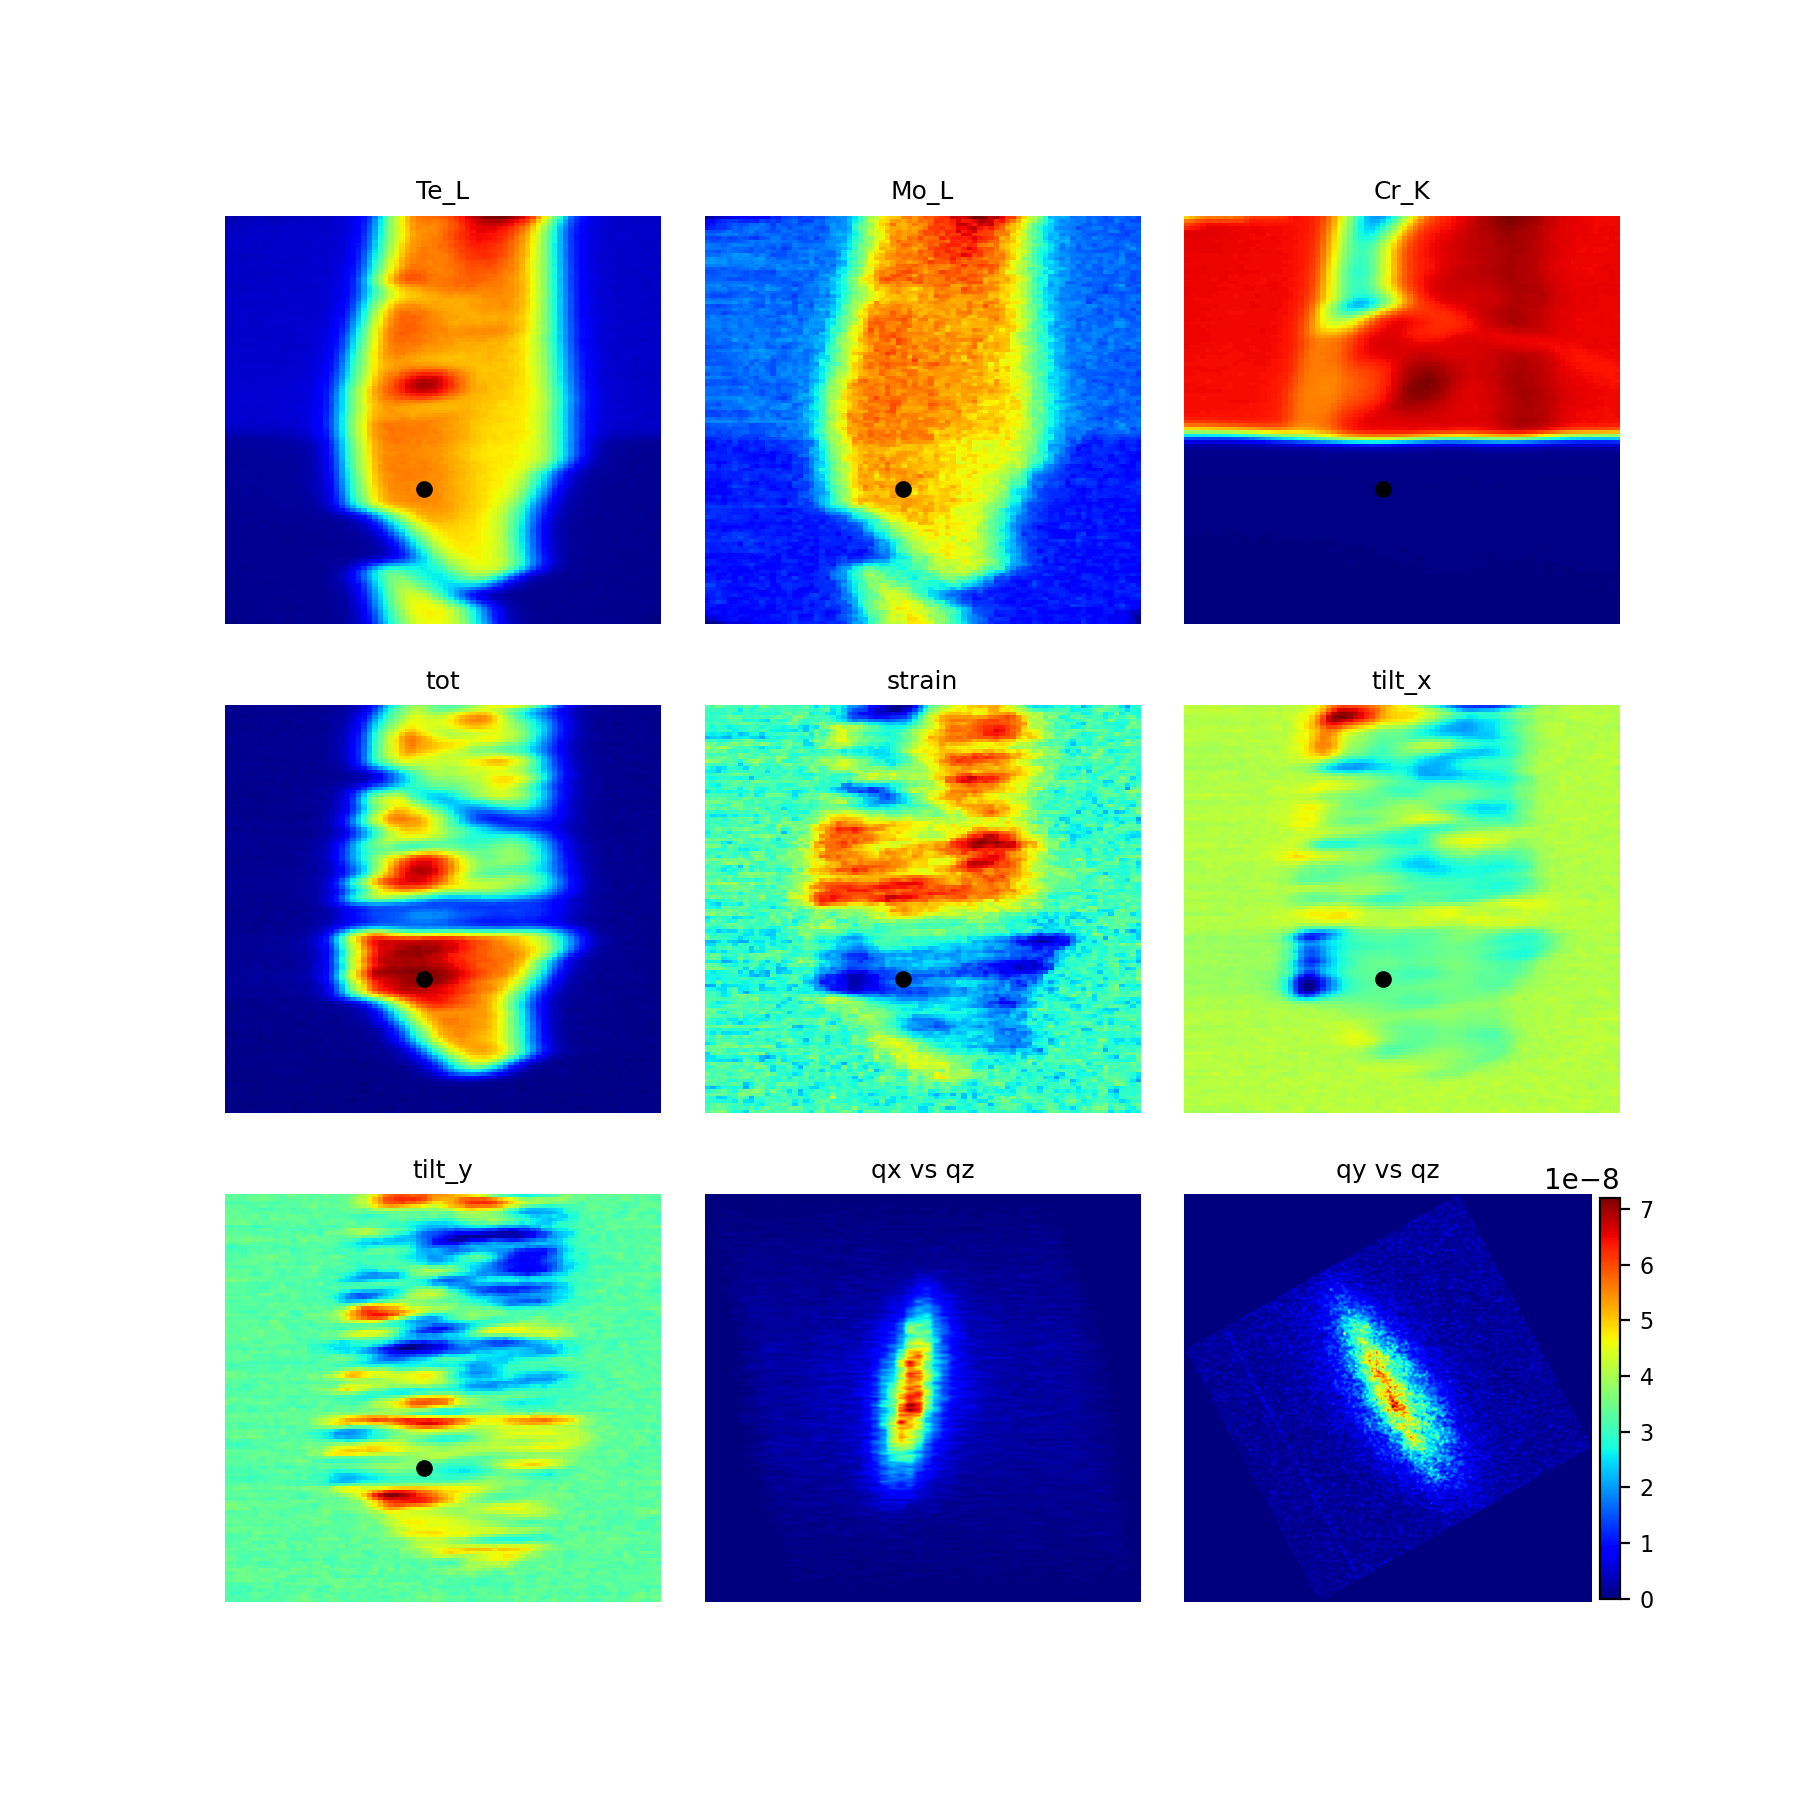

In [13]:
rsm.run_interactive()

In [17]:
rsm.xq.shape

(149, 57, 220)

In [ ]:
 def save_npy(rsm,pararent_folder):
    data_folder = ''.join([pararent_folder,'npy//'])
    
    create_folder(data_folder)
    np.save(''.join([data_folder,'pos_qx_qz_data.npy']),rsm.qxz_data)
    np.save(''.join([data_folder,'pos_qy_qz_data.npy']),rsm.qyz_data)
    np.save(''.join([data_folder,'xq_data.npy']),rsm.xq)
    np.save(''.join([data_folder,'yq_data.npy']),rsm.yq)
    np.save(''.join([data_folder,'zq_data.npy']),rsm.zq)

def create_folder(folder_path):
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
        print(f"Folder '{folder_path}' created.")
    else:
        print(f"Folder '{folder_path}' already exists.")

In [ ]:
save_npy(rsm,data_path)

In [ ]:
qxz = np.swapaxes(rsm.qxz_data,2,3)
qyz = np.swapaxes(rsm.qyz_data,2,3)

qxz[qxz > 0.001] = 0
interactive_map(elem_list,stack,'rsm',np.log10(qxz+1e-7),cmap='jet')

qyz[qyz > 0.001] = 0
interactive_map(elem_list,stack,'rsm',np.log10(qyz+1e-7),cmap='jet')


In [ ]:
%matplotlib
ref_qxz = np.sum(np.swapaxes(rsm.qxz_data,2,3)[92,5:100,:,:],axis=0)/95
qxz = np.swapaxes(rsm.qxz_data,2,3)- ref_qxz
qxz[qxz<=0] = 1e-8
interactive_map(elem_list,stack,'rsm',np.log10(qxz),cmap='jet')

In [ ]:
ref_qyz = np.swapaxes(rsm.qyz_data,2,3)[15,5,:,:]
qyz = np.swapaxes(rsm.qyz_data,2,3)- ref_qyz
qyz[qyz<=0] = 1e-8
interactive_map(elem_list,stack,'rsm',np.log10(qyz),cmap='jet')

In [ ]:

#rsm.qxz_data = np.swapaxes(qxz,2,3)[:,:,:,0:115]
#rsm.qyz_data = np.swapaxes(qyz,2,3)[:,:,:,0:115]

rsm.calcSTRAIN('com') 
rsm.disp()

In [ ]:
save_path = '//data//users//2023Q2//Murray_2023Q2//GAAFET_35_percent_10nm//processed_rsm_50x100_nm//'
rsm.save(save_path)
save_file = ''.join([save_path,'rsm_35_percent_50x100_nm_processed.obj'])
pickle.dump(rsm, open(save_file,'wb'),protocol = 4)

In [ ]:
interactive_map(elem_list,stack,'rsm',np.swapaxes(rsm.qxz_data,2,3),cmap='jet')

In [ ]:
stack.shape

In [ ]:
desc ={
    'title':'Movie',
    'artist': 'hyan',
    'comment': 'GAAFET_35_percent_50x100_nm',
    'save_file': 'movie_GAAFET_35_percent_50x100_nm.mp4',
    'fps': 15,
    'dpi': 100
}
running_path = [[9,j] for j in range(4,21)]
running_path = np.concatenate([running_path,[[i,20] for i in range(9,62)]])

In [ ]:
create_movie(desc, elem_list,stack,'rsm',np.log10(np.swapaxes(rsm.qxz_data,2,3)+1e-6),running_path)

In [ ]:
FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title=desc['title'], artist=desc['artist'],
                comment=desc['comment'])
writer = FFMpegWriter(fps=desc['fps'], metadata=metadata)

In [ ]:
writer.saving(fig, desc['save_file'], dpi=desc['dpi'])

In [ ]:
matplotlib.__version__

In [ ]:
writer.grab_frame()

In [ ]:
with writer.saving(fig, desc['save_file'], dpi=desc['dpi']):
    writer.grab_frame()